# HEART FAILURE PREDICTION DATASET:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df= pd.read_csv("/home/siddharth/Desktop/heart.csv")

## 1) Prelimanary analysis:

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.select_dtypes(include=["object"]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sex             918 non-null    object
 1   ChestPainType   918 non-null    object
 2   RestingECG      918 non-null    object
 3   ExerciseAngina  918 non-null    object
 4   ST_Slope        918 non-null    object
dtypes: object(5)
memory usage: 36.0+ KB


In [6]:
df.select_dtypes(include=["float","int"]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           918 non-null    int64  
 1   RestingBP     918 non-null    int64  
 2   Cholesterol   918 non-null    int64  
 3   FastingBS     918 non-null    int64  
 4   MaxHR         918 non-null    int64  
 5   Oldpeak       918 non-null    float64
 6   HeartDisease  918 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 50.3 KB


## from above exploration we see:
    1) there are no Nan values
    2) the label column is binary 
    3) 5 of 12 columns have data type object
    4) 1 column consists float values 
    5) 6 columns contain int values.
    
    
    

## 2) Splitting numeric and object data into different Data Frames and analysing: 

In [7]:
df_nu=df.select_dtypes(include=["float","int"])
df_nu.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [8]:
df_obj=df.select_dtypes(include=["object"])
df_obj.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


## i) Analysing the numerical data : 

In [9]:
df_nu

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc4753d32d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc4753d3810>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc4753d3090>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc4753d3f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc475361290>],
 'means': []}

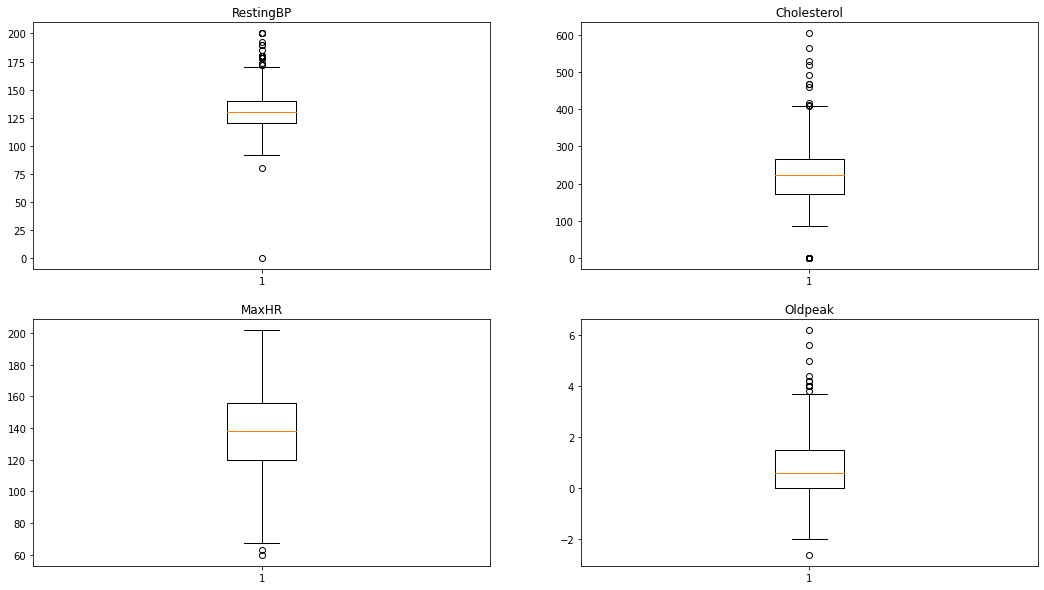

In [10]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.title('RestingBP')
plt.boxplot(df_nu["RestingBP"])
plt.subplot(2,2,2)
plt.title('Cholesterol')
plt.boxplot(df_nu["Cholesterol"])
plt.subplot(2,2,3)
plt.title ("MaxHR")
plt.boxplot(df_nu["MaxHR"])
plt.subplot(2,2,4)
plt.title('Oldpeak')
plt.boxplot(df_nu['Oldpeak'])

In [11]:
#filling zero values in "RestingBP" and "Cholestrol" with mean values in original data frame. 
df["RestingBP"]=df['RestingBP'].apply(lambda x: int(df["RestingBP"].mean()) if x==0 else x)
df["Cholesterol"]= df["Cholesterol"].apply(lambda x : int(df["Cholesterol"].mean()) if x==0 else x)
        




In [12]:
df["RestingBP"].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123, 102,
        96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192, 129,
       164])

In [13]:
df["Cholesterol"].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181, 236, 203, 153, 316, 311, 252, 458,
       384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 123, 17

## ii) Analysing effect of object type data on heart disease:

In [14]:

df_obj["HeartDisease"]= df["HeartDisease"]

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_obj.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,M,ATA,Normal,N,Up,0
1,F,NAP,Normal,N,Flat,1
2,M,ATA,ST,N,Up,0
3,F,ASY,Normal,Y,Flat,1
4,M,NAP,Normal,N,Up,0


From graph we see that probability of heart failure is higher in men


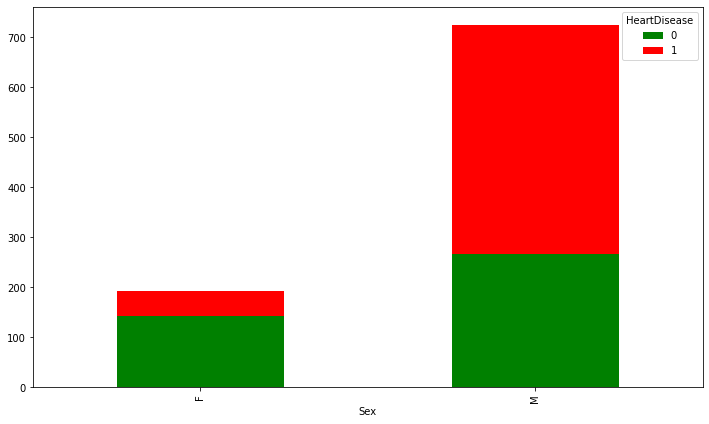

In [16]:
sex= df_obj.groupby(["Sex","HeartDisease"]).size().unstack()
sex.plot.bar(stacked=True, figsize=(12,7), color=["g","r"])
print("From graph we see that probability of heart failure is higher in men")


from below graph we see that out of 500 test subjects that reported ASY chest pain only 100 did not have heart disease.


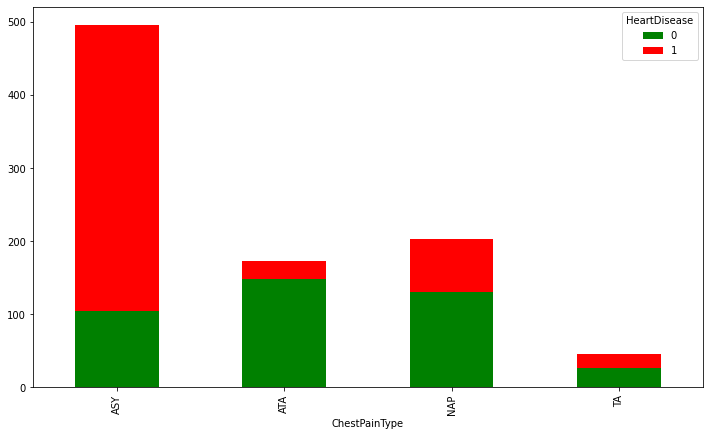

In [17]:
chestpaintype= df_obj.groupby(["ChestPainType", "HeartDisease"]).size().unstack()
chestpaintype.plot.bar(stacked= True, figsize=(12,7), color=["g", 'r'])
print("from below graph we see that out of 500 test subjects that reported ASY chest pain only 100 did not have heart disease.")

<AxesSubplot:xlabel='RestingECG'>

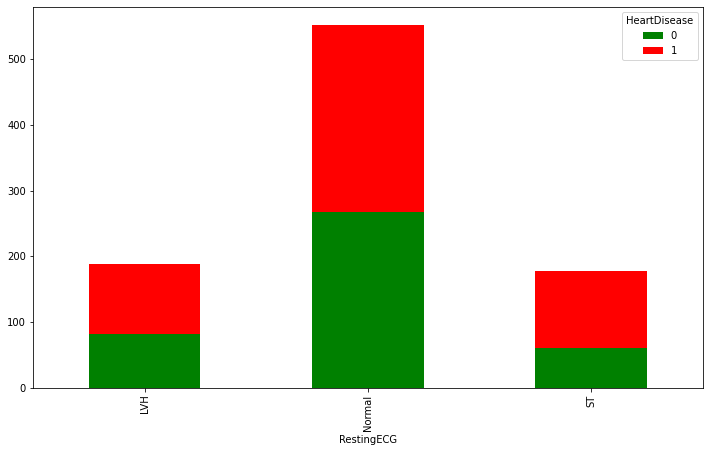

In [18]:
RestingECG= df_obj.groupby(["RestingECG", "HeartDisease"]).size().unstack()
RestingECG.plot.bar(stacked= True, figsize=(12,7), color=["g", 'r'])

A huge number of test subjects who had exercise angia also had heart disease


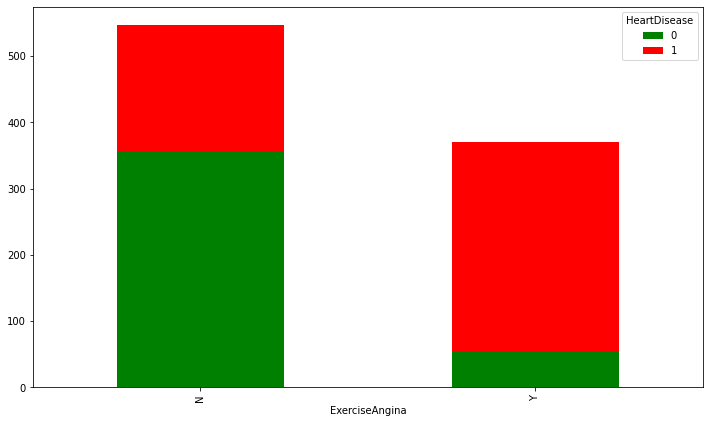

In [19]:
ExerciseAngina= df_obj.groupby(["ExerciseAngina", "HeartDisease"]).size().unstack()
ExerciseAngina.plot.bar(stacked= True, figsize=(12,7), color=["g", 'r'])
print("A huge number of test subjects who had exercise angia also had heart disease")

ST_Slope flat and Down show a large number of patients who have heart diease in comparison to patients free from heart disease


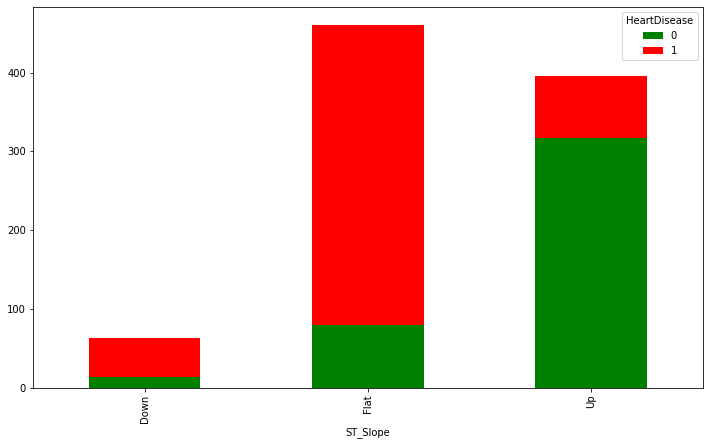

In [20]:
ST_Slope= df_obj.groupby(["ST_Slope", "HeartDisease"]).size().unstack()
ST_Slope.plot.bar(stacked= True, figsize=(12,7), color=["g", 'r'])
print ("ST_Slope flat and Down show a large number of patients who have heart diease in comparison to patients free from heart disease")


## 3) Encoding non numeric data.

In [21]:
df2=df

In [22]:
df2=pd.get_dummies(df2)

In [23]:
X=df2.drop(['HeartDisease'], axis=1)

In [24]:
Y= df2['HeartDisease']

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   Sex_F              918 non-null    uint8  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ASY  918 non-null    uint8  
 9   ChestPainType_ATA  918 non-null    uint8  
 10  ChestPainType_NAP  918 non-null    uint8  
 11  ChestPainType_TA   918 non-null    uint8  
 12  RestingECG_LVH     918 non-null    uint8  
 13  RestingECG_Normal  918 non-null    uint8  
 14  RestingECG_ST      918 non-null    uint8  
 15  ExerciseAngina_N   918 non-null    uint8  
 16  ExerciseAngina_Y   918 non

In [26]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

# 3) USING CLASSIFICATION ALGORITHIMS 

In [27]:
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
from scipy import stats 
import numpy as np

## i) NAIVE BAYES CLASSIFICATION:

In [28]:
nb=GaussianNB()

In [29]:
Xnor=((X)-(np.min(X)))/((np.max(X))-(np.min(X)))

In [30]:
Xnor.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.500000,0.393822,0.0,0.788732,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.666667,0.183398,0.0,0.676056,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.416667,0.382239,0.0,0.267606,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.483333,0.249035,0.0,0.338028,0.465909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.583333,0.212355,0.0,0.436620,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [31]:
x_train, x_test, y_train, y_test= train_test_split (Xnor, Y)

In [32]:
nb.fit(x_train, y_train)

GaussianNB()

In [33]:
print("Naive Bayes Score:", nb.score(x_test, y_test))

Naive Bayes Score: 0.8652173913043478


In [34]:
y_pred=nb.fit(x_train,y_train).predict(x_test)
print("number of mislabeled points out of %d points= %d" %(x_test.shape[0], (y_pred!=y_test).sum()))

number of mislabeled points out of 230 points= 31


## ii)SUPPORT VECTOR MACHINE (SVM):

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn import svm 
from sklearn.svm import SVC

In [36]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [37]:
x2_train, x2_test, y2_train, y2_test=train_test_split (X_scaled, Y)

In [38]:

svc=SVC(kernel='linear', C=1)

In [39]:
svc.fit(x2_train, y2_train)

SVC(C=1, kernel='linear')

In [40]:
y_pred2= svc.fit(x2_train, y2_train).predict(x2_test)
print ("number of mislabeled points out of %d points = %d" %(x_test.shape[0], (y_pred2 != y2_test).sum()))

number of mislabeled points out of 230 points = 29


In [41]:
print("SVC score=", svc.score(x2_test, y2_test))

SVC score= 0.8739130434782608


## UTILIZING GRIDSEARCH  CV  TO GET HYPERPARAMETERS :

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
# defining parameter range
param_grid= {"C": [0.01, 0.1, 1, 10], "gamma": [1, 0.1, 0.01], 'kernel':['linear']}

In [44]:
grid= GridSearchCV(SVC(), param_grid, refit= True, verbose= 3)
grid.fit(x2_train, y2_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.877 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.826 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.847 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.854 total time=   0.0s
[CV 1/5] END ..C=0.01, gamma=0.1, kernel=linear;, score=0.877 total time=   0.0s
[CV 2/5] END ..C=0.01, gamma=0.1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ..C=0.01, gamma=0.1, kernel=linear;, score=0.826 total time=   0.0s
[CV 4/5] END ..C=0.01, gamma=0.1, kernel=linear;, score=0.847 total time=   0.0s
[CV 5/5] END ..C=0.01, gamma=0.1, kernel=linear;, score=0.854 total time=   0.0s
[CV 1/5] END .C=0.01, gamma=0.01, kernel=linear;, score=0.877 total time=   0.0s
[CV 2/5] END .C=0.01, gamma=0.01, kernel=linear;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear']},
             verbose=3)

In [67]:
print(grid.best_params_)

{'C': 0.01, 'gamma': 1, 'kernel': 'linear'}


In [46]:
grid_predictions= grid.predict(x2_test)

In [47]:
grid.score(x2_test, y2_test)

0.8695652173913043

## iii) LOGISTIC REGRESSION :

In [48]:
from sklearn.linear_model import LogisticRegression


In [49]:
lr= LogisticRegression()

In [50]:
lr.fit(x2_train, y2_train)

LogisticRegression()

In [51]:
lr.score(x2_test, y2_test)

0.8565217391304348

## iv) K-Nearest Neighbours :

In [54]:
from sklearn.neighbors import KNeighborsClassifier 

In [55]:
KNN= KNeighborsClassifier()

In [56]:
KNN.fit(x2_train, y2_train)

KNeighborsClassifier()

In [57]:
KNN.score(x2_test, y2_test)

0.8434782608695652

## v) Decision Tree Classifier:

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dt= DecisionTreeClassifier()
x3_train, x3_test, y3_train, y3_test= train_test_split(X_scaled, Y)

In [85]:
dt.fit(x3_train, y3_train)

DecisionTreeClassifier()

In [86]:
dt.score(x3_test, y3_test)

0.8260869565217391

In [95]:
tree_param= {'criterion':["gini", "entropy"], 'splitter' : ["best", "random"], 'max_depth':range(1,20)}
grid2= GridSearchCV(DecisionTreeClassifier(),tree_param, verbose=1, refit= True )

In [96]:
grid2.fit(x3_train, y3_train)

Fitting 5 folds for each of 76 candidates, totalling 380 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'splitter': ['best', 'random']},
             verbose=1)

In [100]:
print(grid2.best_params_)
print (grid2.best_estimator_)

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}
DecisionTreeClassifier(max_depth=4, splitter='random')


In [101]:
grid2.score(x3_test, y3_test)

0.8391304347826087

## vi) XGBOOST CLASSIFIER:

In [125]:
from xgboost import XGBClassifier

In [191]:
clf= XGBClassifier(max_depth=6, learning_rate=0.9 )

In [192]:
clf.fit(x3_train, y3_train)

/home/siddharth/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:18:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.9, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [193]:
clf.score(x3_test, y3_test)

0.8739130434782608

# Best scores achieved by SVM classifier and XGB Classifier 